# Process of results

First some imports

In [1]:
import os
import os.path

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

Next, we read all finalized CSV files from the given `input_directory`:

In [2]:
input_directory = Path("./results/eros")
output_directory = Path("./results/eros")

# Error of interest
error_of_interest = "relRMSE"

df = csv_reader.read_result_csv(
    input_directory,
    include=["results.csv"],
    exclude=["checkpoint", "validation"]
)

# Nearly finished runs
df = pd.concat(
    [
        df,
        pd.read_csv(Path("results/eros/polyhedral-total-eros-seed-9/results_checkpoint_0025.csv")),
        pd.read_csv(Path("results/eros/polyhedral-total-eros-seed-37/results_checkpoint_0026.csv"))
    ],
    ignore_index=True
)

analysis_df = df.copy()

Let's look at the initial result

In [3]:
df

,sample,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,learning_rate,iterations,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,eros,results/polyhedral-total-eros-seed-7,0,2500,7,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,6.354564e-09,0.000016,0.014459,0.011412,0.055651,0.014105,0.060400,0.039170,0.434184,0.088905
1,eros,results/polyhedral-total-eros-seed-7,1,2500,7,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,4.628082e-09,0.000012,1.137252,0.902872,4.295064,1.123254,1.644462,1.096040,5.683376,1.273517
2,eros,results/polyhedral-total-eros-seed-7,2,2500,7,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,7.982369e-09,0.000020,1.149129,0.906573,4.322508,1.106890,1.585460,1.055936,5.565744,1.246266
3,eros,results/polyhedral-total-eros-seed-7,3,2500,7,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,2.441443e-08,0.000062,0.020282,0.015998,0.074772,0.018776,0.132399,0.088551,1.342499,0.319363
4,eros,results/polyhedral-total-eros-seed-7,4,2500,7,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,4.105669e-08,0.000105,1.133099,0.894914,4.238392,1.087145,1.562429,1.036790,5.506980,1.224706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,eros,results/polyhedral-total-eros-seed-37,22,2500,37,mascon,normalized_L1_loss,1000,0.0001,10000,...,9.936915e-08,0.000253,1.068336,0.846613,4.126503,1.059902,1.510729,1.001535,5.413669,1.204358
121,eros,results/polyhedral-total-eros-seed-37,23,2500,37,mascon,normalized_L1_loss,1000,0.0001,10000,...,4.099726e-07,0.001045,1.194829,0.985020,4.101254,1.143769,1.789528,1.193164,5.920368,1.313827
122,eros,results/polyhedral-total-eros-seed-37,24,2500,37,mascon,normalized_L1_loss,1000,0.0001,10000,...,4.404605e-08,0.000113,0.033396,0.026589,0.121204,0.030704,0.084475,0.055428,0.383839,0.081655
123,eros,results/polyhedral-total-eros-seed-37,25,2500,37,mascon,normalized_L1_loss,1000,0.0001,10000,...,3.221041e-07,0.000821,1.182443,0.947766,4.253228,1.141550,1.709353,1.138909,5.791553,1.292599


And save the unmodified concatenated DataFrame to a file

In [4]:
filename = "total_results_eros.csv"
df.to_csv(output_directory.joinpath(filename))

# Processing and Data Visualization

First, we drop every uninteresting parameter and focus on the selected error. Further, we rember the used altitudes for validation.

In [5]:
interesting_columns = ["sample", "seed", "ground_truth", "sample_domain", "noise"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])

analysis_df = analysis_df[interesting_columns]
analysis_df = analysis_df.fillna("None")
analysis_df

,sample,seed,ground_truth,sample_domain,noise,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9,relRMSE@High Altitude,relRMSE@Low Altitude
0,eros,7,polyhedral,"[0.0, 1.0]",[''],0.098266,0.636065,0.047396,0.013285,0.007262,0.001549,0.000810,0.000151,0.000079,0.000016,0.014105,0.088905
1,eros,7,polyhedral,"[1.0, 3.0]",[''],0.871227,1.142046,0.913065,0.778981,1.111992,0.356339,0.026280,0.000162,0.000066,0.000012,1.123254,1.273517
2,eros,7,polyhedral,"[3.0, 5.0]",[''],0.962978,0.926139,1.090541,1.087696,0.902539,0.353534,0.035914,0.000209,0.000099,0.000020,1.106890,1.246266
3,eros,7,polyhedral,"[0.0, 1.0]","['gaussian', 0.0, 0.009337]",0.104535,0.087195,0.051115,0.018526,0.012176,0.004390,0.002564,0.000579,0.000301,0.000062,0.018776,0.319363
4,eros,7,polyhedral,"[1.0, 3.0]","['gaussian', 0.0, 0.009337]",0.925535,0.996847,1.423905,0.969307,0.720690,0.429543,0.046300,0.001072,0.000520,0.000105,1.087145,1.224706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,eros,37,mascon,"[1.0, 3.0]","['gaussian', 0.0, 0.009337]",0.890636,0.958938,1.402740,1.466933,0.735738,0.354414,0.047206,0.002765,0.001279,0.000253,1.059902,1.204358
121,eros,37,mascon,"[3.0, 5.0]","['gaussian', 0.0, 0.009337]",1.003379,1.072874,1.474198,1.213035,0.902803,0.500610,0.224311,0.011417,0.005341,0.001045,1.143769,1.313827
122,eros,37,mascon,"[0.0, 1.0]","['gaussian', 0.0, 0.093371]",0.108877,0.091112,0.069898,0.031794,0.020333,0.007812,0.005182,0.001025,0.000534,0.000113,0.030704,0.081655
123,eros,37,mascon,"[1.0, 3.0]","['gaussian', 0.0, 0.093371]",0.973667,1.147463,1.202431,1.465474,0.949645,0.481380,0.171687,0.008168,0.003914,0.000821,1.141550,1.292599


Time to replace the altitudes and make them more readable:

In [6]:
ALTITUDES = ast.literal_eval(df.at[0, "validation_sampling_altitudes"])
print(ALTITUDES)

print(unit_conversion.convert_altitude("eros", np.array([1.0, 3.0, 5.0]), unit='km'))

[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
[ 20.41386485  61.24159455 102.06932425]


In [7]:
unit_conversion.convert_pandas_altitudes(analysis_df, ALTITUDES, convert_height=False, only_height=True)
analysis_df

,sample,seed,ground_truth,sample_domain,noise,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,relRMSE@High Altitude,relRMSE@Low Altitude
0,eros,7,polyhedral,"[0.0, 1.0]",[''],0.098266,0.636065,0.047396,0.013285,0.007262,0.001549,0.000810,0.000151,0.000079,0.000016,0.014105,0.088905
1,eros,7,polyhedral,"[1.0, 3.0]",[''],0.871227,1.142046,0.913065,0.778981,1.111992,0.356339,0.026280,0.000162,0.000066,0.000012,1.123254,1.273517
2,eros,7,polyhedral,"[3.0, 5.0]",[''],0.962978,0.926139,1.090541,1.087696,0.902539,0.353534,0.035914,0.000209,0.000099,0.000020,1.106890,1.246266
3,eros,7,polyhedral,"[0.0, 1.0]","['gaussian', 0.0, 0.009337]",0.104535,0.087195,0.051115,0.018526,0.012176,0.004390,0.002564,0.000579,0.000301,0.000062,0.018776,0.319363
4,eros,7,polyhedral,"[1.0, 3.0]","['gaussian', 0.0, 0.009337]",0.925535,0.996847,1.423905,0.969307,0.720690,0.429543,0.046300,0.001072,0.000520,0.000105,1.087145,1.224706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,eros,37,mascon,"[1.0, 3.0]","['gaussian', 0.0, 0.009337]",0.890636,0.958938,1.402740,1.466933,0.735738,0.354414,0.047206,0.002765,0.001279,0.000253,1.059902,1.204358
121,eros,37,mascon,"[3.0, 5.0]","['gaussian', 0.0, 0.009337]",1.003379,1.072874,1.474198,1.213035,0.902803,0.500610,0.224311,0.011417,0.005341,0.001045,1.143769,1.313827
122,eros,37,mascon,"[0.0, 1.0]","['gaussian', 0.0, 0.093371]",0.108877,0.091112,0.069898,0.031794,0.020333,0.007812,0.005182,0.001025,0.000534,0.000113,0.030704,0.081655
123,eros,37,mascon,"[1.0, 3.0]","['gaussian', 0.0, 0.093371]",0.973667,1.147463,1.202431,1.465474,0.949645,0.481380,0.171687,0.008168,0.003914,0.000821,1.141550,1.292599


In [8]:
unit_conversion.convert_altitude("eros", np.array(ALTITUDES), unit='km')

array([2.04138649e-02, 1.02069324e-01, 2.04138649e-01, 1.02069324e+00,
       2.04138649e+00, 1.02069324e+01, 2.04138649e+01, 1.02069324e+02,
       2.04138649e+02, 1.02069324e+03])

In [9]:
analysis_df = analysis_df.drop(
    ["sample", "seed", f"{error_of_interest}@High Altitude", f"{error_of_interest}@Low Altitude"], axis=1
)
analysis_df["sample_domain"] = analysis_df["sample_domain"].apply(lambda x: str(x))
analysis_df.groupby(["sample_domain", "noise", "ground_truth"]).mean()

0.001  \
sample_domain noise                                              ground_truth             
[0. 1.]       ['']                                               mascon        0.099763   
                                                                 polyhedral    0.107414   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon        0.111327   
                                                                 polyhedral    0.095811   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon        0.232884   
                                                                 polyhedral    0.129078   
              ['constant_bias', [9.79917e-05, 0.0, 0.0]]         mascon        0.095835   
                                                                 polyhedral    0.119674   
              ['gaussian', 0.0, 0.009337]                        mascon        0.126710   
                                                                 polyhedral    0.134314   
              ['gaussian', 0.0, 0.093371]                        mascon        0.217061   
                                                                 polyhedral    0.303858   
[1. 3.]       ['']                                               mascon        0.958490   
                                                                 polyhedral    0.892861   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon        0.872065   
                                                                 polyhedral    0.961408   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon        1.345727   
                                                                 polyhedral    1.322530   
              ['constant_bias', [9.79917e-05, 0.0, 0.0]]         mascon        1.121799   
                                                                 polyhedral    1.103424   
              ['gaussian', 0.0, 0.009337]                        mascon        0.843106   
                                                                 polyhedral    1.012477   
              ['gaussian', 0.0, 0.093371]                        mascon        1.047822   
                                                                 polyhedral    1.214130   
[3. 5.]       ['']                                               mascon        1.053969   
                                                                 polyhedral    0.921271   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon        1.004158   
                                                                 polyhedral    1.062330   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon        1.135710   
                                                                 polyhedral    1.058838   
              ['constant_bias', [9.79917e-05, 0.0, 0.0]]         mascon        1.068917   
                                                                 polyhedral    1.011883   
              ['gaussian', 0.0, 0.009337]                        mascon        0.976354   
                                                                 polyhedral    1.167567   
              ['gaussian', 0.0, 0.093371]                        mascon        1.137837   
                                                                 polyhedral    1.120317   

                                                                                  0.005  \
sample_domain noise                                              ground_truth             
[0. 1.]       ['']                                               mascon        0.082669   
                                                                 polyhedral    0.206182   
              ['combined', 0.0, 0.009337, [9.79917e-05, 0.0, ... mascon        0.712373   
                                                                 polyhedral    0.099411   
              ['combined', 0.0, 0.093371, [9.79917e-05, 0.0, ... mascon      

Time for plotting. First make the DataFrame wide

In [10]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = analysis_df.melt(["sample_domain", "noise", "ground_truth"], str_altitudes, var_name="distance", value_name=error_of_interest)

dfm["distance"] = dfm["distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,sample_domain,noise,ground_truth,distance,relRMSE
0,[0. 1.],[''],polyhedral,0.001,0.098266
1,[1. 3.],[''],polyhedral,0.001,0.871227
2,[3. 5.],[''],polyhedral,0.001,0.962978
3,[0. 1.],"['gaussian', 0.0, 0.009337]",polyhedral,0.001,0.104535
4,[1. 3.],"['gaussian', 0.0, 0.009337]",polyhedral,0.001,0.925535
...,...,...,...,...,...
1245,[1. 3.],"['gaussian', 0.0, 0.009337]",mascon,50.000,0.000253
1246,[3. 5.],"['gaussian', 0.0, 0.009337]",mascon,50.000,0.001045
1247,[0. 1.],"['gaussian', 0.0, 0.093371]",mascon,50.000,0.000113
1248,[1. 3.],"['gaussian', 0.0, 0.093371]",mascon,50.000,0.000821


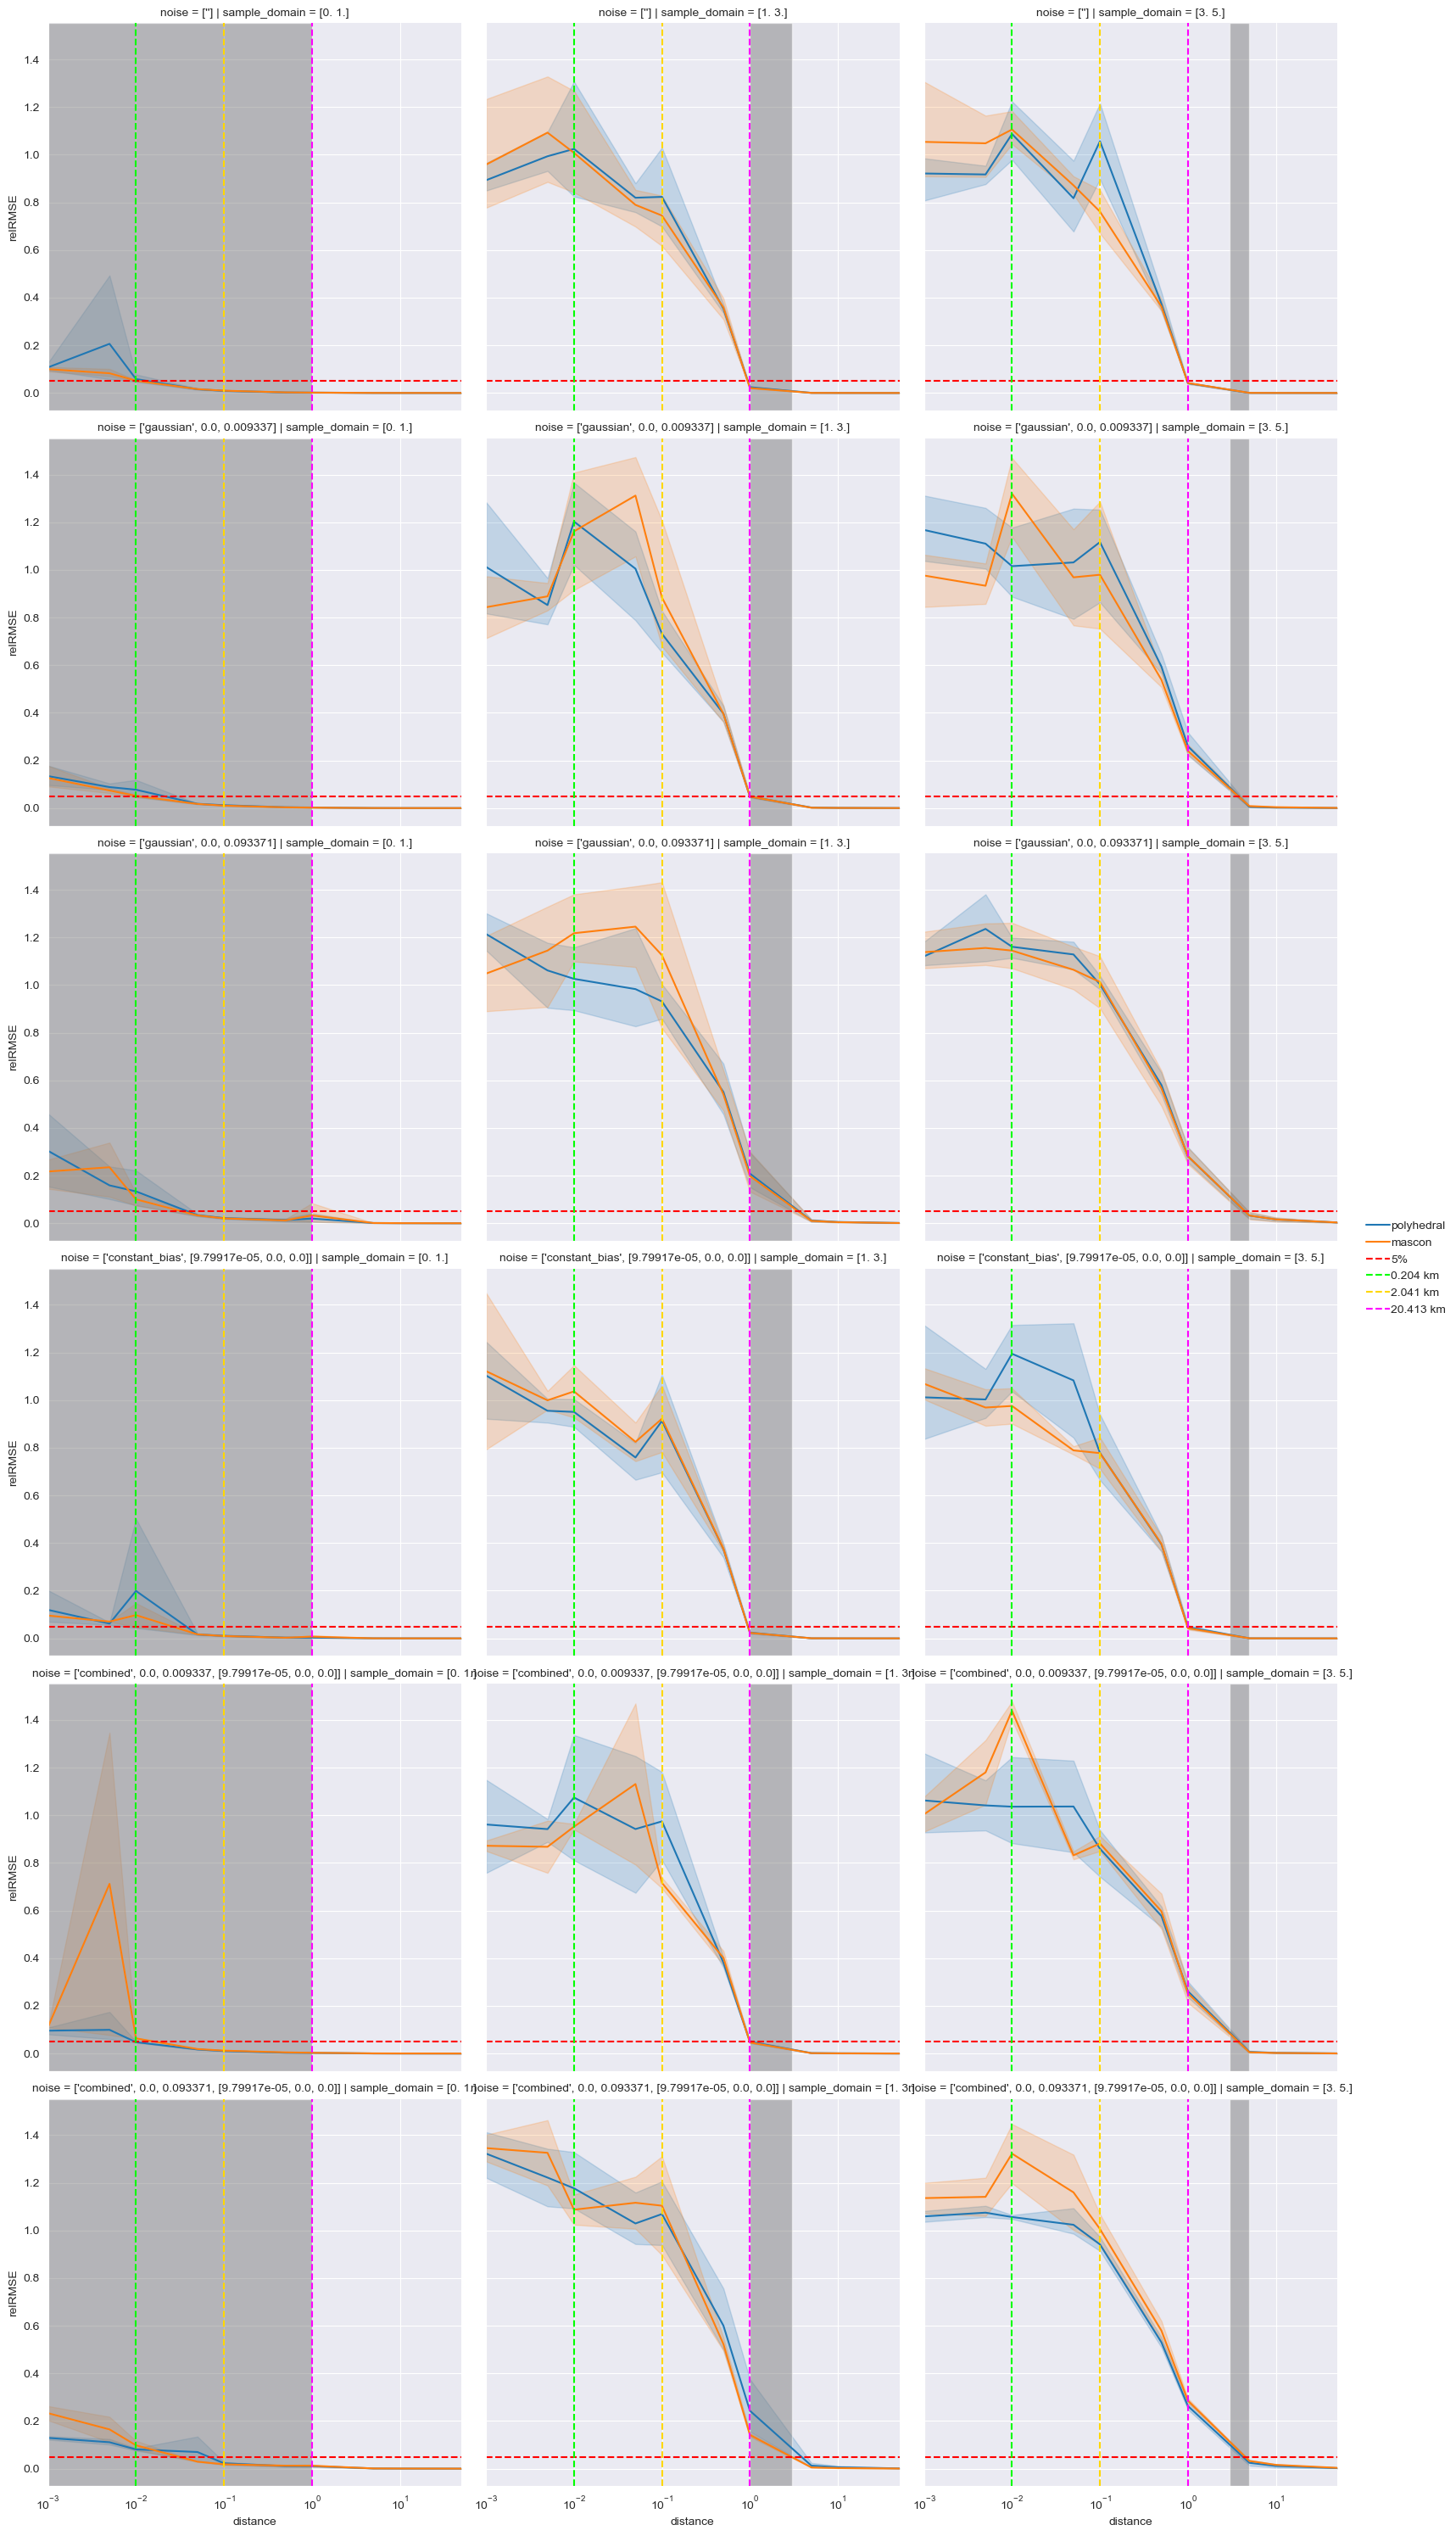

In [11]:
g = sns.relplot(
    data=dfm, kind="line",
    x="distance", y=error_of_interest, col="sample_domain", row="noise",
    hue="ground_truth"
)
g.set(xlim=(0.0, 50.0), xscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.01, ls='--', c='lime', label="0.204 km")
g.map(plt.axvline, x=0.1, ls='--', c='gold', label="2.041 km")
g.map(plt.axvline, x=1.0, ls='--', c='fuchsia', label="20.413 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,1]:
    ax.axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,2]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)

# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"eros_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

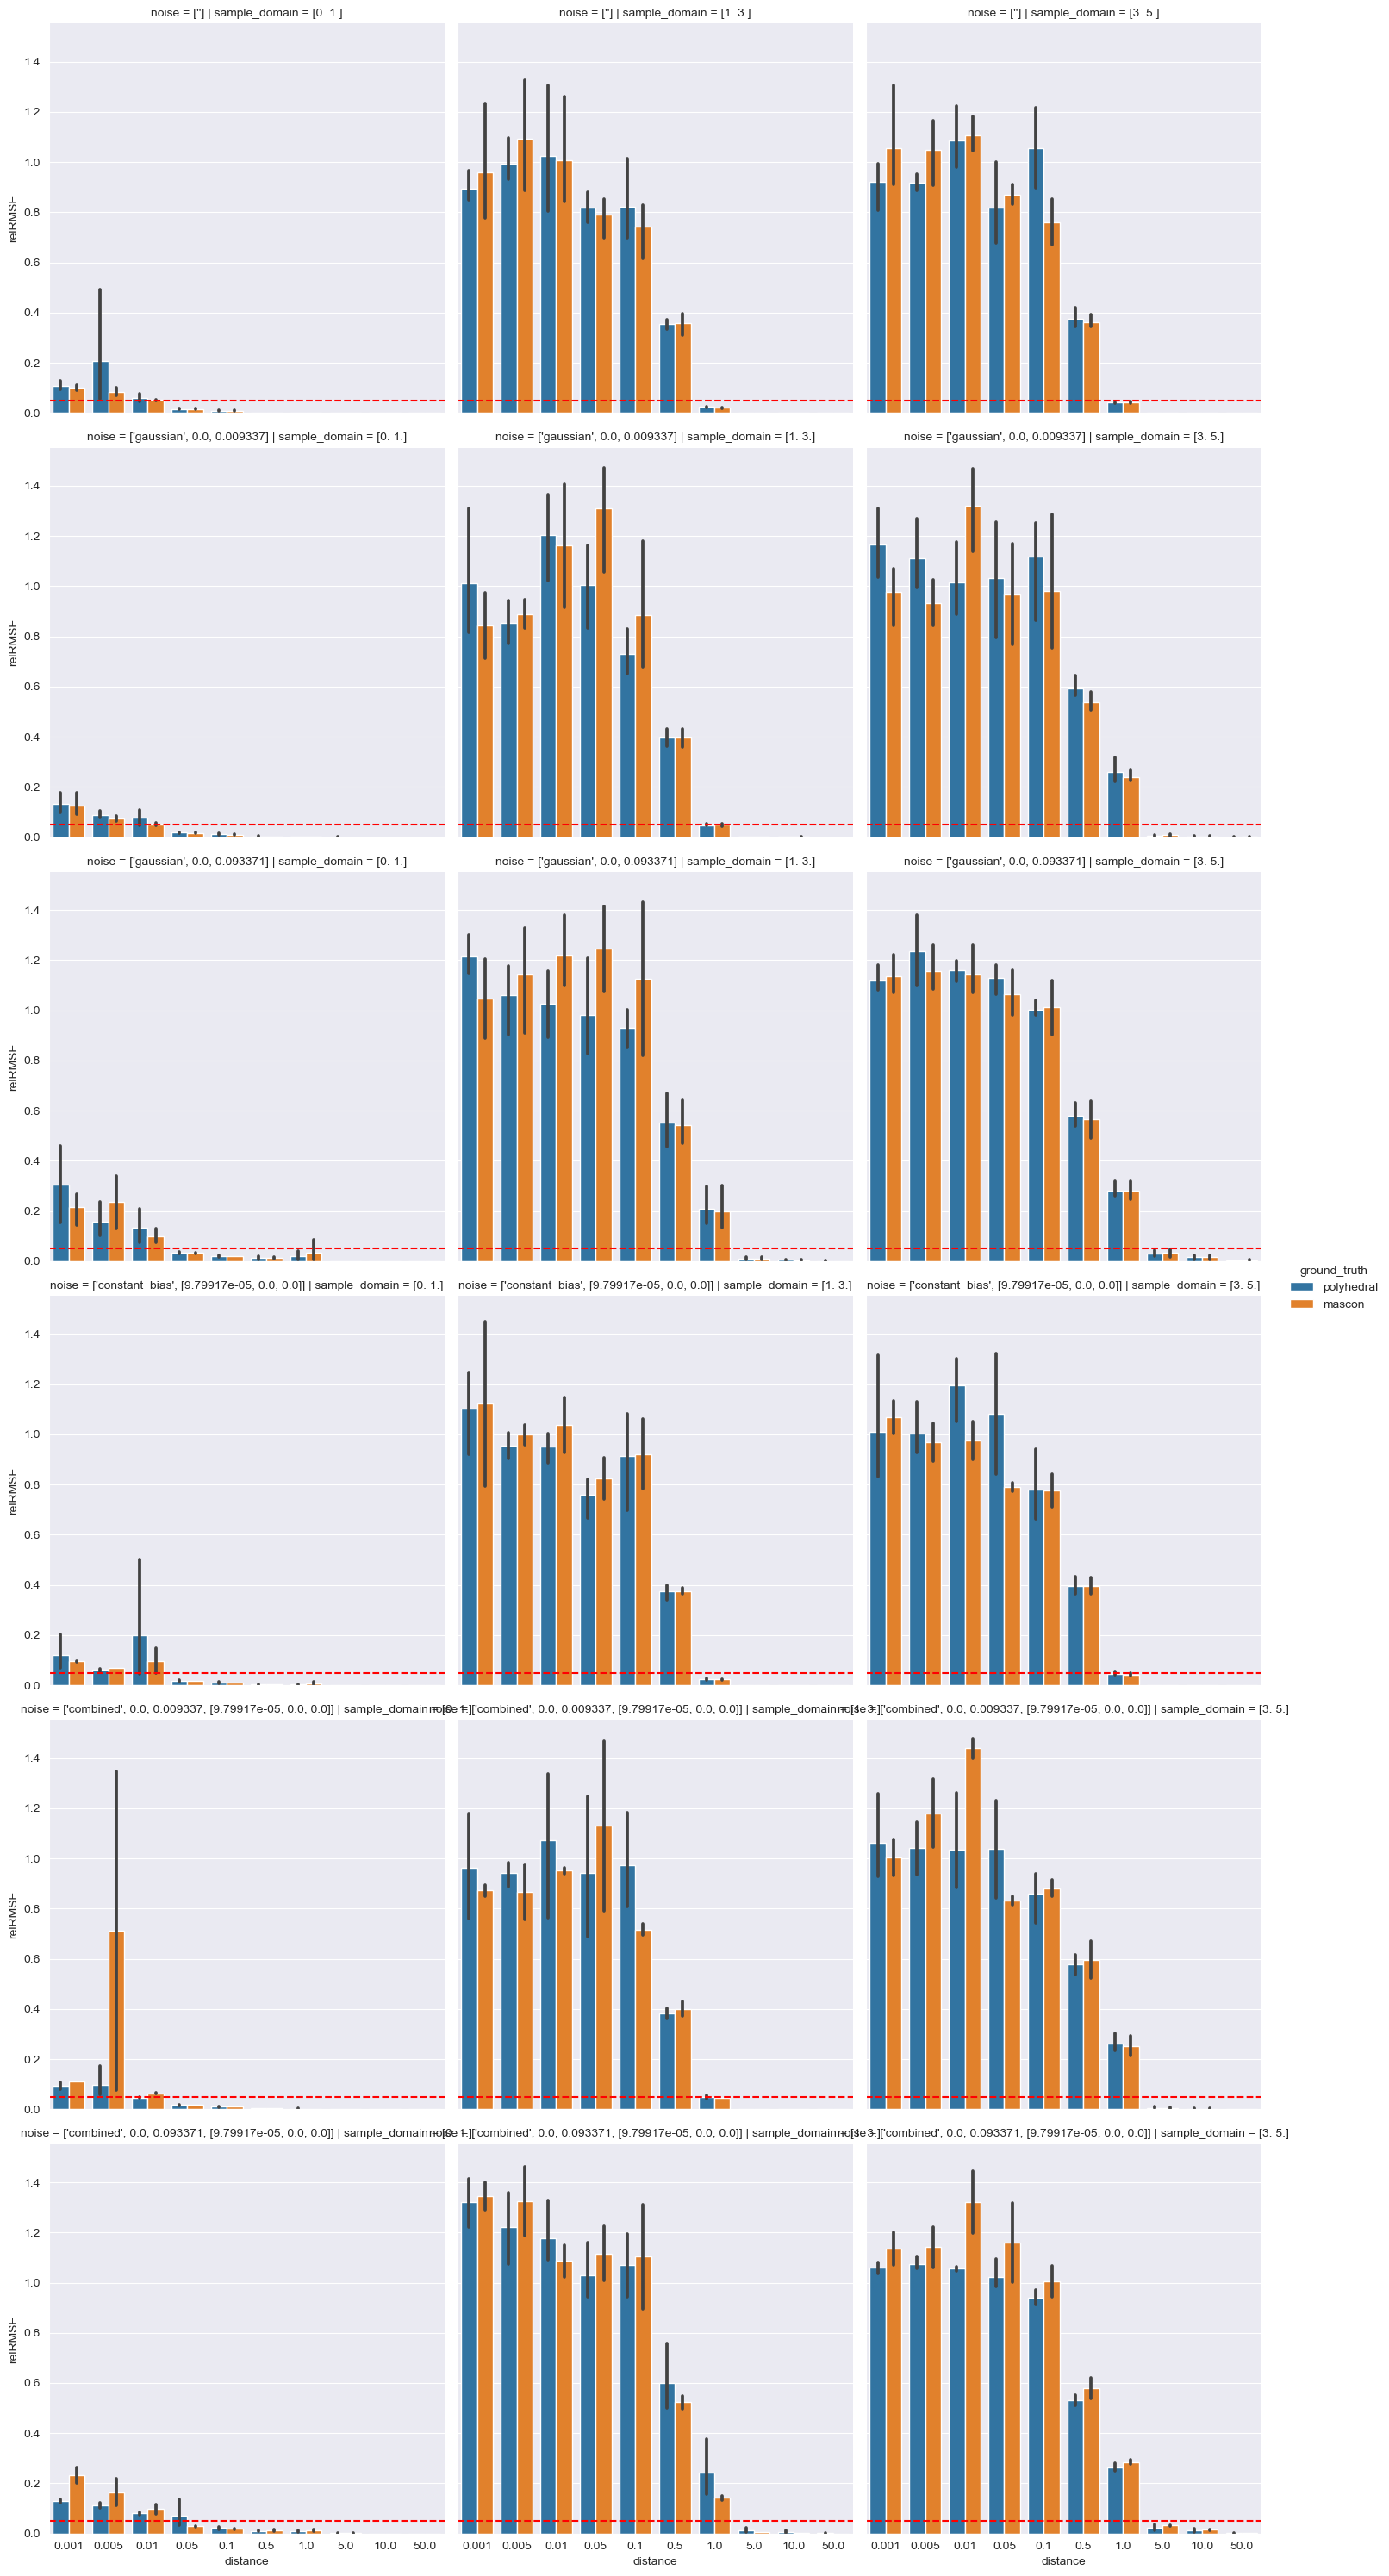

In [12]:
g = sns.catplot(
    data=dfm, kind="bar",
    x="distance", y=error_of_interest, col="sample_domain", row="noise",
    hue="ground_truth"
)
g.map(plt.axhline, y=0.05, ls='--', c='red')
# g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()
save_path = os.path.join(output_directory, f"eros_norm_{error_of_interest}_bar.png")
g.savefig(save_path, dpi=300)